## 1. 데이터 살펴보기

In [1]:
import pandas as pd

simpsons = pd.read_csv('number_pic_char.csv')

In [5]:
simpsons.head(15)

,Unnamed: 0,name,total,train,test,bounding_box
0,0,Homer Simpson,2246,1909,337,612
1,1,Ned Flanders,1454,1236,218,595
2,2,Moe Szyslak,1452,1234,218,215
3,3,Lisa Simpson,1354,1151,203,562
4,4,Bart Simpson,1342,1141,201,554
5,5,Marge Simpson,1291,1097,194,557
6,6,Krusty The Clown,1206,1025,181,226
7,7,Principal Skinner,1194,1015,179,506
8,8,Charles Montgomery Burns,1193,1014,179,650
9,9,Milhouse Van Houten,1079,917,162,210


In [18]:
simpsons.drop(7, axis = 0, inplace = True)
simpsons.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
simpsons

,name,total,train,test,bounding_box
0,Homer Simpson,2246,1909,337,612
1,Ned Flanders,1454,1236,218,595
2,Moe Szyslak,1452,1234,218,215
3,Lisa Simpson,1354,1151,203,562
4,Bart Simpson,1342,1141,201,554
5,Marge Simpson,1291,1097,194,557
6,Krusty The Clown,1206,1025,181,226
8,Charles Montgomery Burns,1193,1014,179,650
9,Milhouse Van Houten,1079,917,162,210
10,Chief Wiggum,986,838,148,209


In [22]:
simpsons.train.sum()

12338

## 2. CNN 모델 학습

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout

In [29]:
# 이미지 augmentation 을 위한 생성기
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, #shearing transformation 의 각도 범위 (반시계방향)
                                   zoom_range = 0.2, #확대 비율 ([1-zoom_range, 1+zoom_range])
                                   rotation_range=40, #각도 이동 범위 (180도 이내)
                                   width_shift_range=0.2, # 수평 이동 비율
                                   height_shift_range=0.2, # 수직 이동 비율
                                   vertical_flip = True, #무작위로 뒤집기 (vertical 방향)
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

# flow_from_directory 는 폴더 내에 있는 하위폴더별로 class 생성하여 내부 이미지 전부 변환해서 출력함
training_set = train_datagen.flow_from_directory('simpson_dataset/',
                                                 target_size = (100, 100), #디폴트 = (256,256), 입력된 이미지의 크기 변환
                                                 batch_size = 32,
                                                 class_mode = 'categorical', #이진분류 시 'binary'
                                                 subset= 'training')
#                                                  save_to_dir='augmented/', #augment 된 이미지 저장
#                                                  save_prefix='aug') 

test_set = test_datagen.flow_from_directory('testset/',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

validation_set = train_datagen.flow_from_directory('simpson_dataset/', 
                                                        target_size=(100,100),
                                                        batch_size= 32,
                                                        class_mode='categorical',
                                                        subset='validation')
                                                

Found 11618 images belonging to 11 classes.
Found 544 images belonging to 11 classes.
Found 2898 images belonging to 11 classes.


In [32]:
classifier = Sequential()

# Feature Extraction
classifier.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())

# Classification Layer 

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 11, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [33]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 363, # 원본데이터 수 / 배치 수 
                         epochs = 100,
                         validation_data = validation_set,
                         validation_steps = 90) # 검증데이터 수 / 배치 수

Epoch 1/100
364/364 [==============================] - 105s 288ms/step - loss: 2.1891 - acc: 0.2282 - val_loss: 2.1180 - val_acc: 0.2812
Epoch 2/100
364/364 [==============================] - 96s 264ms/step - loss: 1.8405 - acc: 0.3811 - val_loss: 1.8436 - val_acc: 0.3927
Epoch 3/100
364/364 [==============================] - 96s 264ms/step - loss: 1.6252 - acc: 0.4634 - val_loss: 1.6785 - val_acc: 0.4586
Epoch 4/100
364/364 [==============================] - 100s 273ms/step - loss: 1.4430 - acc: 0.5192 - val_loss: 1.4635 - val_acc: 0.5193
Epoch 5/100
364/364 [==============================] - 96s 263ms/step - loss: 1.2863 - acc: 0.5735 - val_loss: 1.4146 - val_acc: 0.5469
Epoch 6/100
364/364 [==============================] - 109s 300ms/step - loss: 1.2114 - acc: 0.6054 - val_loss: 1.3681 - val_acc: 0.5631
Epoch 7/100
364/364 [==============================] - 98s 270ms/step - loss: 1.1228 - acc: 0.6287 - val_loss: 1.3078 - val_acc: 0.5835
Epoch 8/100
364/364 [========================

Epoch 38/100
364/364 [==============================] - 93s 257ms/step - loss: 0.5792 - acc: 0.8097 - val_loss: 0.8516 - val_acc: 0.7409
Epoch 39/100
364/364 [==============================] - 97s 267ms/step - loss: 0.5782 - acc: 0.8153 - val_loss: 0.9222 - val_acc: 0.7384
Epoch 40/100
364/364 [==============================] - 97s 266ms/step - loss: 0.5603 - acc: 0.8152 - val_loss: 0.8675 - val_acc: 0.7395
Epoch 41/100
364/364 [==============================] - 94s 257ms/step - loss: 0.5707 - acc: 0.8167 - val_loss: 0.8678 - val_acc: 0.7440
Epoch 42/100
364/364 [==============================] - 91s 251ms/step - loss: 0.5671 - acc: 0.8192 - val_loss: 0.8168 - val_acc: 0.7557
Epoch 43/100
364/364 [==============================] - 91s 251ms/step - loss: 0.5791 - acc: 0.8124 - val_loss: 0.9334 - val_acc: 0.7374
Epoch 44/100
364/364 [==============================] - 92s 253ms/step - loss: 0.5513 - acc: 0.8195 - val_loss: 0.8757 - val_acc: 0.7405
Epoch 45/100
364/364 [===================

Epoch 75/100
364/364 [==============================] - 94s 259ms/step - loss: 0.4715 - acc: 0.8473 - val_loss: 0.8741 - val_acc: 0.7598
Epoch 76/100
364/364 [==============================] - 94s 259ms/step - loss: 0.4586 - acc: 0.8511 - val_loss: 0.8483 - val_acc: 0.7743
Epoch 77/100
364/364 [==============================] - 94s 259ms/step - loss: 0.4813 - acc: 0.8402 - val_loss: 0.7897 - val_acc: 0.7702
Epoch 78/100
364/364 [==============================] - 94s 259ms/step - loss: 0.4656 - acc: 0.8483 - val_loss: 0.7738 - val_acc: 0.7788
Epoch 79/100
364/364 [==============================] - 95s 260ms/step - loss: 0.4751 - acc: 0.8494 - val_loss: 0.8344 - val_acc: 0.7622
Epoch 80/100
364/364 [==============================] - 104s 285ms/step - loss: 0.4628 - acc: 0.8466 - val_loss: 0.7732 - val_acc: 0.7750
Epoch 81/100
364/364 [==============================] - 100s 274ms/step - loss: 0.4529 - acc: 0.8529 - val_loss: 0.8030 - val_acc: 0.7771
Epoch 82/100
364/364 [=================

In [34]:
result = classifier.evaluate(test_set)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

17/17 [==============================] - 1s 68ms/step - loss: 0.3110 - acc: 0.9062
loss (cross-entropy) : 0.31101492222617655
test accuracy : 0.90625


## 2-1. 모델 저장

In [118]:
from tensorflow.keras.models import load_model

classifier.save('simpsons_classifier.h5')

## 2-2. 모델 성능 시각화

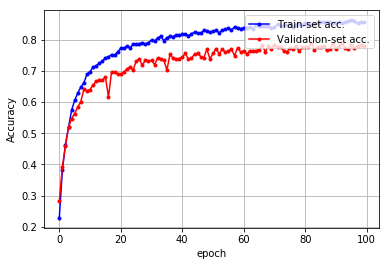

In [39]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

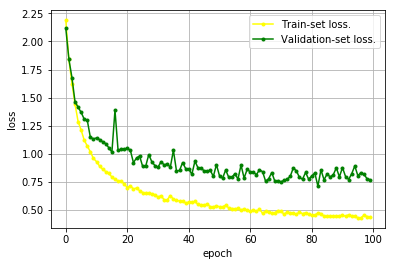

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='yellow', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='green', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

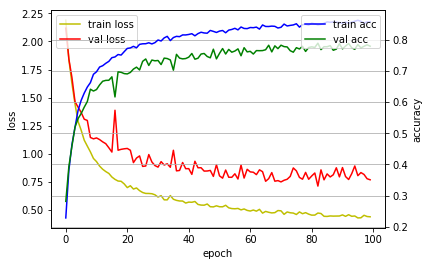

In [41]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.grid()
plt.show()

## 3. 결과 시각화

In [95]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import cv2

In [108]:
name_code = dict(training_set.class_indices)
first_name_list = ['abraham', 'bart', 'charles', 'wiggum', 'homer', 'krusty', 'lisa', 'marge', 'milhouse', 'moe', 'ned']

def which_simpson(first_name):
    
    img_path = 'simpson characters_new data/'+ first_name + '.jpg'
    new_img = load_img(img_path, target_size=(100,100))
    arr_img = img_to_array(new_img)
    img = arr_img.reshape((1,) + arr_img.shape)
    img = img.astype('float32')/255
    
    num_code = classifier.predict_proba(img).argmax()
    proba = classifier.predict(img).max() * 100
    
    for key, value in name_code.items():
        if num_code == value: name = key
    
    name = name.replace('_', ' ')
    
    print('\nPredicted Image: ')
    
    show_img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
       
    print(f'This person is: {name} \nWith a probability of: {proba}')

Predicted:  abraham

Predicted Image: 


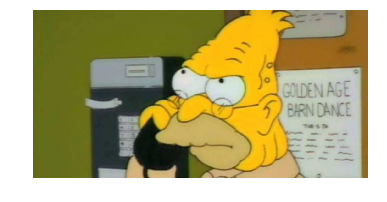

This person is: abraham grampa simpson 
With a probability of: 64.97375965118408

---------------------------------------------------------
Predicted:  bart

Predicted Image: 


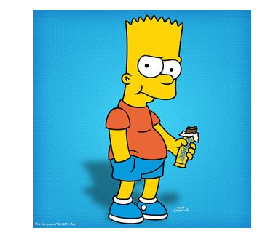

This person is: bart simpson 
With a probability of: 99.97033476829529

---------------------------------------------------------
Predicted:  charles

Predicted Image: 


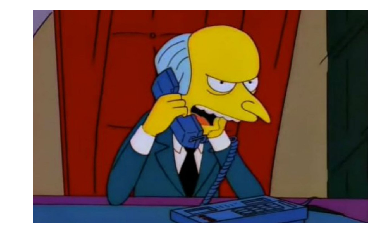

This person is: charles montgomery burns 
With a probability of: 99.9951958656311

---------------------------------------------------------
Predicted:  wiggum

Predicted Image: 


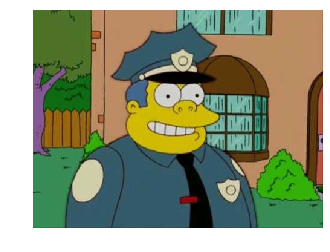

This person is: chief wiggum 
With a probability of: 99.99994039535522

---------------------------------------------------------
Predicted:  homer

Predicted Image: 


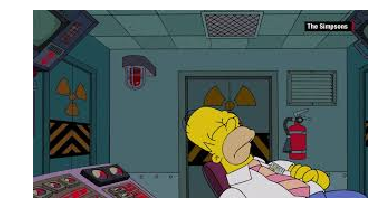

This person is: homer simpson 
With a probability of: 66.0373866558075

---------------------------------------------------------
Predicted:  krusty

Predicted Image: 


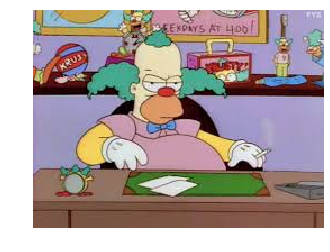

This person is: krusty the clown 
With a probability of: 99.80498552322388

---------------------------------------------------------
Predicted:  lisa

Predicted Image: 


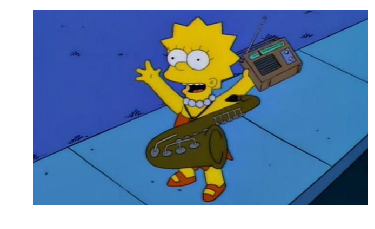

This person is: marge simpson 
With a probability of: 77.70527601242065

---------------------------------------------------------
Predicted:  marge

Predicted Image: 


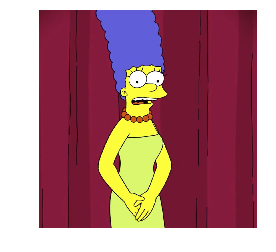

This person is: marge simpson 
With a probability of: 99.96039271354675

---------------------------------------------------------
Predicted:  milhouse

Predicted Image: 


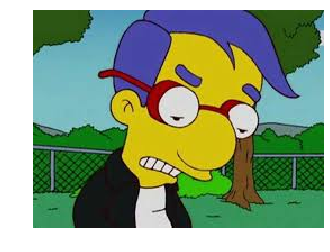

This person is: milhouse van houten 
With a probability of: 99.64202642440796

---------------------------------------------------------
Predicted:  moe

Predicted Image: 


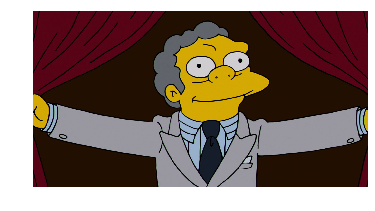

This person is: moe szyslak 
With a probability of: 96.90302610397339

---------------------------------------------------------
Predicted:  ned

Predicted Image: 


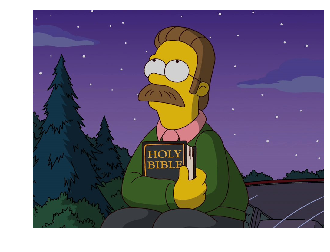

This person is: ned flanders 
With a probability of: 100.0

---------------------------------------------------------


In [130]:
for name_to_find in first_name_list:
    print('Predicted: ', name_to_find)
    which_simpson(name_to_find)
    print('\n---------------------------------------------------------')

Found 544 images belonging to 11 classes.


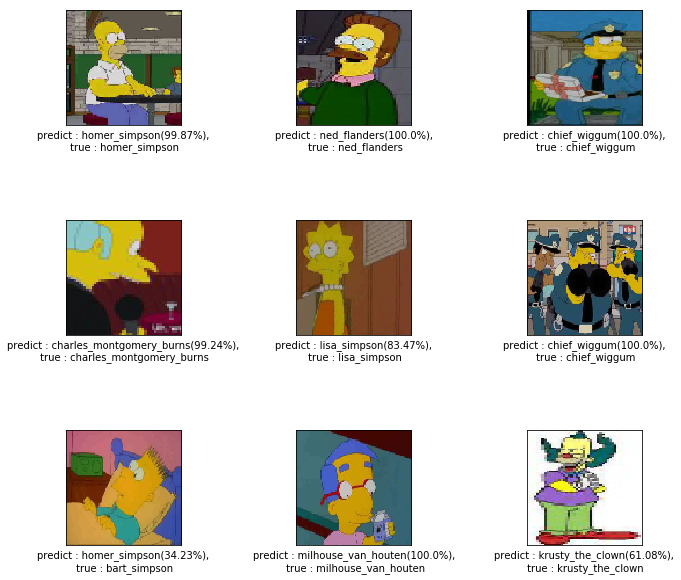

In [129]:
import matplotlib.pyplot as plt

class_names = {0 : 'abraham_grampa_simpson', 1 : 'bart_simpson', 2 : 'charles_montgomery_burns', 
               3 : 'chief_wiggum', 4 : 'homer_simpson', 5 : 'krusty_the_clown', 6 : 'lisa_simpson', 
               7 : 'marge_simpson', 8 : 'milhouse_van_houten', 9 : 'moe_szyslak', 10 : 'ned_flanders'}
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "testset/", 
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical')
plt.figure(figsize=(10, 10))
for i in range(9):
    
    img = test_generator[0][0][i]
    img_re = img.reshape((1,)+test_generator[0][0][i].shape)
    output = classifier.predict(img_re)
    
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(wspace=1, hspace=0.35)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel("predict : {}({}%),\n true : {}"
           .format(class_names[np.argmax(output)], round((output[0][np.argmax(output)]) * 100, 2),
                   class_names[np.argmax(test_generator[0][-1][i])]))
plt.show()